# Density-based spatial clustering of applications with noise (DBSCAN) / Основанная на плотности пространственная кластеризация для приложений с шумами

---

**Источники:**


[Density-based spatial clustering of applications with noise (DBSCAN)](https://en.wikipedia.org/wiki/DBSCAN)

[Основанная на плотности пространственная кластеризация для приложений с шумами](https://ru.wikipedia.org/wiki/DBSCAN)

[DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

[Интересные алгоритмы кластеризации, часть вторая: DBSCAN](https://habr.com/ru/post/322034/)

[Determination of Optimal Epsilon (Eps) Value on DBSCAN Algorithm to Clustering Data on Peatland Hotspots in Sumatra](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)

[DBSCAN Python Example: The Optimal Value For Epsilon (EPS)](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

[Изоморфизм](https://ru.wikipedia.org/wiki/%D0%98%D0%B7%D0%BE%D0%BC%D0%BE%D1%80%D1%84%D0%B8%D0%B7%D0%BC)

[HDBSCAN](https://github.com/scikit-learn-contrib/hdbscan)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install basemap matplotlib -y

In [4]:
# !conda install -c conda-forge umap-learn -y

In [5]:
import numpy as np

np.__version__

'1.20.2'

In [6]:
import pandas as pd

pd.__version__

'1.2.4'

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.__version__

'3.3.4'

In [8]:
import seaborn as sns

sns.__version__

'0.11.1'

In [9]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [10]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer

sklearn.__version__

'0.24.2'

## Описание

DBSCAN — это алгоритм кластеризации данных, который предложили Маритин Эстер, Ганс-Петер Кригель, Ёрг Сандер и Сяовэй Су в 1996.

**Подходит для данных, содержащих кластеры одинаковой плотности.**

Это алгоритм кластеризации, **основанной на плотности** — если дан набор точек в некотором пространстве, алгоритм **группирует точки, которые тесно расположены** (точки со многими близкими соседями), **помечая как выбросы** точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).

**DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации, и наиболее часто упоминается в научной литературе.**

В 2014 алгоритм получил премию "проверено временем (test of time)" (премия даётся алгоритмам, которые получили существенное внимание в теории и практике) на ведущей конференции по интеллектуальному анализу данных.


Самые важные гиперпараметры [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

- **`eps (default=0.5)`** - максимальное расстояние между двумя примерами (samples), чтобы один считался соседним с другим. Это не максимальная граница расстояний до точек в кластере. Это наиболее важный параметр DBSCAN, который нужно выбрать в соответствии с набором данных и функцией расстояния (`metric`).

- **`min_samples (default=5)`** - количество примеров (samples) или общий вес в окрестности точки, которая будет считаться базовой точкой. Сюда входит и сама точка.

Любая задача интеллектуальной обработки данных имеет проблему параметров. 

Любой параметр специфично влияет на алгоритм. Для алгоритма DBSCAN нужны параметры `eps`  и `min_samples`.

**В идеале, значение `eps`  определяется решаемой задачей (например, физические расстояния), а `min_samples` определяет тогда минимальный желаемый размер кластера.**

**OPTICS** можно рассматривать как **обобщение DBSCAN**, в котором параметр **`eps`  заменяется максимальным значением**, наиболее воздействующим на эффективность. **`min_samples` тогда становится минимальным размером кластера**.

Хотя алгоритм **OPTICS** существенно проще в области выбора параметров, чем DBSCAN, его результаты труднее использовать, так как он обычно даёт иерархическую кластеризацию вместо простого разделения, которое даёт DBSCAN.

<img src="images/DBSCAN.gif" width=550/>

<img src="images/DBSCAN_search.gif" width=850/>

### Рекомендации по выбору гиперпараметров `eps`  и `min_samples`

- **`min_samples`**

    - Минимальное значение `min_samples` может быть получено из размерности `D` (например, 2D, 3D, 8D = количество признаков) набора данных как $min\_samples \geqslant D +1$. 
    
    - Низкое значение $min\_samples=1$ не имеет смысла, так как тогда любая точка будет кластером.
    
    - Для $min\_samples \leqslant 2$ результат будет тем же самым, что и иерархическая кластеризация с метрикой единичного соединения с отсечением дендрограммы на высоте `eps`.
    
    - **`min_samples` должен быть равным как минимум 3**. 
    
    - Для наборов данных **с шумами большие значения `min_samples` обычно лучше**, и дают более существенные кластеры.
    
    - Эмпирика показывает, что может быть использовано значение $min\_samples = 2 * D$, но может оказаться необходимым **выбор большего значения для больших наборов данных**, для данных с шумом или для данных, содержащих много дубликатов.



- **`eps`**

    - Значение `eps` может быть выбрано с помощью графа k-расстояний, вычерчивая расстояние `k` ($k = min\_samples - 1$) ближайшему соседу в порядке от большего к меньшему.
    
    - **Хорошие значения `eps` те, где график имеет "изгиб"**.
    
    - **Если `eps` выбрана слишком малыми, большая часть данных не будет кластеризована, а для слишком больших значений `eps`  кластеры будут сливаться и большинство объектов окажутся в одном кластере**.
    
    - Обычно **малые значения `eps`  предпочтительнее** и опыт показывает, что только небольшая доля точек должна быть с этим расстоянием друг от друга.
    
    - Альтернативно, может быть использован график OPTICS для выбора `eps`, но тогда и сам алгоритм OPTICS может быть использован для кластеризации.



- **`metric`**: 

    - Выбор функции расстояния сильно связан с выбором `eps` и имеет большое влияние на результаты.
    
    - Обычно сначала необходимо определить обоснованные меры похожести набора данных, прежде чем выбирать параметр `eps`.
    
    - Нет оценок для этого параметра, но **функции расстояния следует выбирать согласно набору данных**.
    
    - Например, для географических данных, расстояние по дуге большого круга часто будет хорошим выбором.

### Преимущества

- DBSCAN **не требует указать число кластеров** в данных априори в отличие от метода k-средних.

- DBSCAN может найти **кластеры произвольной формы**. 
    - DBSCAN может найти даже кластеры полностью окружённые (но не связанные с) другими кластерами.
    - Благодаря параметру `min_samples` уменьшается так называемый эффект одной связи (связь различных кластеров тонкой линией точек).


- DBSCAN имеет понятие шума и **устойчив к выбросам**.

- DBSCAN требует лишь двух параметров и большей частью **нечувствителен к порядку точек** в наборе данных.
    - Однако, точки, находящиеся на границе двух различных кластеров могут оказаться в другом кластере, если изменить порядок точек, а назначение кластеров единственно с точностью до [изоморфизма](https://ru.wikipedia.org/wiki/%D0%98%D0%B7%D0%BE%D0%BC%D0%BE%D1%80%D1%84%D0%B8%D0%B7%D0%BC).


- DBSCAN разработан для применения с базами данных, которые позволяют ускорить запросы в диапазоне значений, например, с помощью [R*-дерева](https://ru.wikipedia.org/wiki/R*-%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE).

- Параметры `min_samples` и `eps`  могут быть установлены экспертами в рассматриваемой области, если данные хорошо понимаются.

### Недостатки

- DBSCAN **не полностью однозначен — краевые точки, которые могут быть достигнуты из более чем одного кластера, могут принадлежать любому из этих кластеров, что зависит от порядка просмотра точек**.
    - Для большинства наборов данных эти ситуации возникают редко и имеют малое влияние на результат кластеризации — основные точки и шум DBSCAN обрабатывает однозначно. 
    - Существует версия DBSCAN, которая трактует краевые точки как шум и тем самым достигается полностью однозначный результат, а также более согласованная статистическая интерпретация связных по плотности компонент.


- Качество DBSCAN **зависит от измерения расстояния (`metric`)**.
    - Наиболее часто используемой метрикой расстояний является евклидова метрика. 
    - Особенно для кластеризации **данных высокой размерности евклидова метрика может оказаться почти бесполезной** ввиду так называемого "[проклятия размерности](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)", что делает трудным делом нахождение подходящего значения `eps`. 
    - Этот эффект, однако, присутствует в любом другом алгоритме, основанном на евклидовом расстоянии.


- DBSCAN не может хорошо кластеризовать наборы данных **с большой разницей в плотности**, поскольку не удается выбрать приемлемую для всех кластеров комбинацию `min_samples` и `eps`.


- Если данные и масштаб не вполне хорошо поняты, **выбор осмысленного порога расстояния `eps`  может оказаться трудным**.

## Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets).

In [11]:
df = pd.read_csv('./../../data/Cust_Segmentation.csv', index_col=0)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


## Анализ данных

См. лекцию [02_pca](../../08_modeling_ml_demensionality_reduction/lectures/02_pca.ipynb)

## Подготовка данных

In [12]:
df['Defaulted'].fillna(0, inplace=True)
df['Defaulted'] = df['Defaulted'].astype(int)
df['Defaulted'].isna().sum()

0

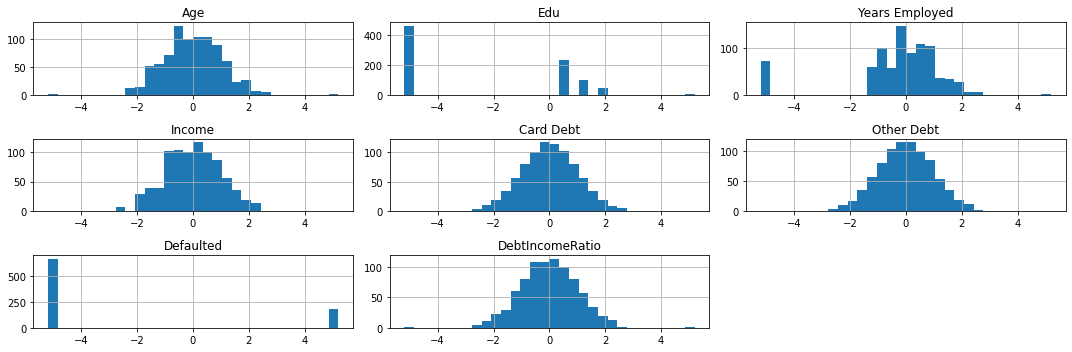

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
df_norm = pd.DataFrame(norm_trans.fit_transform(df[num_cols]), columns=num_cols)
df_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

## Выбор `min_samples`

In [14]:
df_norm

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.731217,0.458679,-0.178175,-1.275817,-1.529084,-0.643500,-5.199338,-0.430727
1,1.335178,-5.199338,2.104286,1.470545,1.470956,1.472335,-5.199338,0.531969
2,-0.152506,0.458679,0.362241,0.713143,1.773029,1.136136,5.199338,1.446225
3,-0.619855,0.458679,-0.515705,-1.275817,-0.205803,-1.335723,-5.199338,-0.430727
4,1.335178,-5.199338,2.572352,2.380597,2.201906,1.543663,-5.199338,-0.242903
...,...,...,...,...,...,...,...,...
845,-0.927754,-5.199338,-0.335333,-0.515705,-0.404273,-0.494490,-5.199338,-0.311038
846,-0.781781,0.458679,-0.037988,-0.037988,-0.733799,0.013092,-5.199338,-0.269066
847,-1.220640,1.807354,-5.199338,-1.434200,1.053891,0.517952,5.199338,2.404824
848,-0.242903,-5.199338,0.589456,-0.348756,-1.592328,-1.083895,-5.199338,-1.275817


In [15]:
min_samples = len(df_norm.columns) + 1
min_samples

9

## Выбор `eps`

In [47]:
from sklearn.neighbors import NearestNeighbors

# рассчитать среднее расстояние между каждой точкой 
# в наборе данных и ее min_samples ближайшими соседями 
neighbors = NearestNeighbors(n_neighbors=min_samples-1)
neighbors_fit = neighbors.fit(df_norm)
distances, indices = neighbors_fit.kneighbors(df_norm)

In [48]:
# сортировка значений расстояний по возрастанию и построение графика
distances = np.sort(distances, axis=0)

In [49]:
distances

array([[0.        , 0.21068558, 0.38629516, ..., 0.54152098, 0.56566165,
        0.61312962],
       [0.        , 0.21068558, 0.39163315, ..., 0.55483054, 0.58420384,
        0.62447786],
       [0.        , 0.22373078, 0.39163315, ..., 0.56871663, 0.61467013,
        0.63926598],
       ...,
       [0.        , 3.64047612, 3.79205844, ..., 4.3718713 , 4.65357135,
        4.75983864],
       [0.        , 3.73359032, 3.91121517, ..., 4.39700718, 4.66115053,
        4.80667673],
       [0.        , 3.80758932, 3.97681791, ..., 4.52699652, 5.07869377,
        5.21030539]])

In [50]:
distances = distances[:, 1]

In [51]:
distances

array([0.21068558, 0.21068558, 0.22373078, 0.22373078, 0.2379839 ,
       0.2379839 , 0.24460016, 0.24460016, 0.26230554, 0.26230554,
       0.27098503, 0.27098503, 0.27782687, 0.27782687, 0.28277159,
       0.28277159, 0.30159017, 0.30159017, 0.31535035, 0.31535035,
       0.33734442, 0.33734442, 0.34015449, 0.34015449, 0.3462585 ,
       0.3462585 , 0.35884223, 0.35884223, 0.36553106, 0.36553106,
       0.37121104, 0.37121104, 0.38100235, 0.38100235, 0.38629516,
       0.39498032, 0.39498032, 0.39799637, 0.39799637, 0.39916134,
       0.39916134, 0.40170952, 0.40170952, 0.4089254 , 0.4089254 ,
       0.41100917, 0.41167211, 0.41167211, 0.41772301, 0.41772301,
       0.41836795, 0.41836795, 0.42210316, 0.42210316, 0.42365272,
       0.42365272, 0.42572013, 0.42572013, 0.43043968, 0.43043968,
       0.43165073, 0.43279837, 0.43279837, 0.43849431, 0.43849431,
       0.43910852, 0.43910852, 0.44361141, 0.44361141, 0.45345684,
       0.45345684, 0.45404182, 0.45404182, 0.45585708, 0.45585

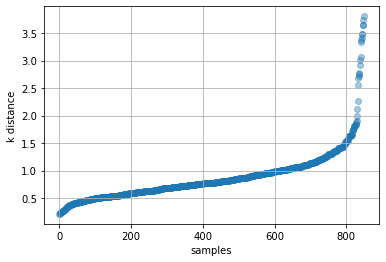

In [19]:
# оптимальное значение для epsilon будет найдено 
# в точке максимальной кривизны
plt.scatter(x=range(len(df_norm)), y=distances, alpha=0.4)

plt.xlabel('samples')
plt.ylabel('k distance')
plt.grid(True)

In [20]:
epsilon=1.55

## 3-D PCA

In [21]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [52]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-135, elev=35)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2],
           alpha=0.4, 
           s=80)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib inline

## 3-D UMAP

In [24]:
umap_3 = UMAP(n_components=3, n_neighbors=min_samples)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

In [53]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           alpha=0.3, 
           s=80)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [55]:
%matplotlib inline

## Функция оценки силуэта

In [27]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

def silhouette_plot(X, labels):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # 1-й подзаголовок - это силуэтный график
    # Коэффициент силуэта может варьироваться в пределах [-1, 1], 
    # но в этом примере все лежат в пределах [-0.1, 1]
    ax.set_xlim([-0.1, 1])

    # (n_clusters+1)*10 предназначен для вставки пустого пространства 
    # между силуэтами отдельных кластеров, чтобы четко их разграничить
    n_clusters = len(set(labels))
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # silhouette_score дает среднее значение для всех выборок
    # это дает представление о плотности и разделении сформированных кластеров
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # агрегация оценок силуэта для выборок, принадлежащих
        # кластеру  i и их сортировка
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # обозначить участки силуэта номерами кластеров в середине
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # вычислить новый y_lower для следующего участка
        y_lower = y_upper + 10  # 10 для 0 выборки

    ax.set_title("The silhouette plot for the various clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # вертикальная линия для средней оценки силуэта всех значений
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # метки осей
    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Построение модели

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_norm)
labels = db.labels_

<AxesSubplot:ylabel='count'>

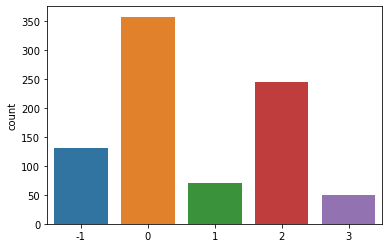

In [30]:
sns.countplot(x=labels)

In [31]:
clusters = np.unique(labels)
clusters

array([-1,  0,  1,  2,  3])

## Анализ результатов

In [33]:
df["Cluster"] = labels
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,2
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,0
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,2
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,0
...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,0
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,2
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,-1


### Colormap

In [32]:
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = ListedColormap(['black', 
                       'coral', 
                       'blue',
                       'lime', 
                       'violet'])

### Оценка силуэта (Silhouette Score)

Типичные графики силуэта представляют метку кластера на оси y, а фактический показатель силуэта — на оси x.

Silhouette Score отображает меру того, **насколько близко каждая точка в кластере находится к точкам в соседних кластерах.**

**Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.**

**Размер/толщина силуэтов также пропорциональны количеству образцов внутри этого кластера.**

Чем выше коэффициенты силуэта (чем ближе к +1), тем дальше образцы кластера находятся от образцов соседних кластеров.

Значение 0 указывает, что образец находится на границе принятия решения между двумя соседними кластерами или очень близко к ней.

Отрицательные значения, напротив, указывают на то, что эти образцы могли быть отнесены к неправильному кластеру.

For n_clusters = 5 The average silhouette_score is : 0.4142942895915526


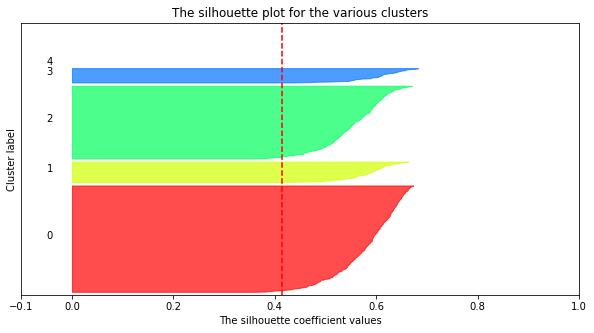

In [56]:
silhouette_plot(df_norm, labels)

### Анализ "представителей" кластеров

In [35]:
df.groupby('Cluster').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,
-1,34.95,2.18,4.90,50.19,2.24,3.90,0.49,11.99
0,35.55,1.00,10.44,42.10,1.21,2.55,0.00,9.02
1,32.70,2.44,5.31,40.34,2.28,3.78,1.00,13.87
2,35.97,2.43,9.32,57.00,1.53,3.24,0.00,8.71
3,30.08,1.00,5.49,28.29,1.76,2.93,1.00,15.76


In [36]:
df_clusters = {}
cluster_examples = pd.DataFrame()

for c in clusters:
    print(f'Cluster = {c}')
    
    df_c = df[df.Cluster == c]
    df_clusters[c] = df_c
    
    middle_row_index = int(len(df_c) * 0.75)
    cluster_examples = cluster_examples.append(df_c.iloc[middle_row_index])
    
    display(df_c)
    display(df_c.describe())
    
    print('\n', '=' * 50, '\n')

Cluster = -1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,-1
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,-1
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,-1
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,-1
...,...,...,...,...,...,...,...,...,...,...
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,-1
827,48,1,13,50,6.114,9.286,1,NBA020,30.8,-1
829,45,3,0,22,0.030,0.894,0,NBA019,4.2,-1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,34.946154,2.184615,4.900000,50.192308,2.235277,3.896277,0.492308,11.991538,-1.0
std,11.018878,1.243804,8.020178,60.913981,3.750436,5.662078,0.501875,8.550262,0.0
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000,-1.0
25%,26.000000,1.000000,0.000000,20.000000,0.323000,0.891750,0.000000,5.825000,-1.0
50%,32.500000,2.000000,0.000000,27.000000,0.848500,1.746000,0.000000,10.100000,-1.0
75%,44.750000,3.000000,7.750000,56.750000,2.117250,4.131250,1.000000,16.475000,-1.0
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000,-1.0




Cluster = 0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,0
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,0
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,0
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,0
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,0
...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,0
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,0
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,357.000000,357.0,357.000000,357.000000,357.000000,357.000000,357.0,357.000000,357.0
mean,35.551821,1.0,10.442577,42.103641,1.207073,2.554728,0.0,9.017367,0.0
std,7.255043,0.0,6.537290,29.657936,1.405268,2.434741,0.0,5.673715,0.0
min,21.000000,1.0,1.000000,15.000000,0.025000,0.101000,0.0,0.400000,0.0
25%,30.000000,1.0,5.000000,24.000000,0.325000,1.008000,0.0,4.900000,0.0
50%,35.000000,1.0,10.000000,33.000000,0.774000,1.799000,0.0,8.000000,0.0
75%,40.000000,1.0,15.000000,50.000000,1.468000,3.021000,0.0,11.600000,0.0
max,54.000000,1.0,31.000000,254.000000,10.679000,16.668000,0.0,32.500000,0.0




Cluster = 1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,1
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,1
37,35,3,5,37,0.581,1.417,1,NBA003,5.4,1
55,29,3,5,70,3.176,10.754,1,NBA006,19.9,1
...,...,...,...,...,...,...,...,...,...,...
744,31,2,6,32,3.341,4.051,1,NBA006,23.1,1
773,26,2,2,24,1.577,1.687,1,NBA006,13.6,1
794,29,3,7,84,6.912,4.512,1,NBA002,13.6,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.0
mean,32.700000,2.442857,5.314286,40.342857,2.279829,3.776443,1.0,13.874286,1.0
std,6.972721,0.628680,4.112698,19.620224,2.095512,3.299422,0.0,6.841342,0.0
min,21.000000,2.000000,1.000000,15.000000,0.119000,0.468000,1.0,2.400000,1.0
25%,28.000000,2.000000,2.000000,26.000000,0.540750,1.318000,1.0,8.525000,1.0
50%,31.500000,2.000000,4.000000,35.500000,1.534500,2.761500,1.0,14.150000,1.0
75%,38.000000,3.000000,7.000000,50.000000,3.299750,4.760250,1.0,18.850000,1.0
max,48.000000,4.000000,18.000000,102.000000,7.759000,17.799000,1.0,36.600000,1.0




Cluster = 2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,2
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,2
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,2
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,2
12,34,2,9,40,0.374,0.266,0,NBA003,1.6,2
...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,2
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,2
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.0
mean,35.971311,2.430328,9.323770,57.000000,1.529127,3.240508,0.0,8.707377,2.0
std,7.459299,0.659890,6.063254,39.538802,1.726923,3.100501,0.0,5.645052,0.0
min,21.000000,2.000000,1.000000,14.000000,0.025000,0.156000,0.0,0.600000,2.0
25%,29.750000,2.000000,5.000000,30.000000,0.414750,1.097500,0.0,4.400000,2.0
50%,35.000000,2.000000,8.000000,44.000000,0.945500,2.207500,0.0,7.350000,2.0
75%,41.000000,3.000000,13.000000,69.500000,1.914250,4.366000,0.0,12.200000,2.0
max,54.000000,4.000000,31.000000,266.000000,9.877000,18.257000,0.0,32.400000,2.0




Cluster = 3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,3
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,3
70,24,1,3,14,0.838,1.416,1,NBA000,16.1,3
94,29,1,1,20,0.569,3.151,1,NBA002,18.6,3
101,30,1,7,33,1.165,7.217,1,NBA002,25.4,3
104,44,1,5,48,1.970,2.350,1,NBA003,9.0,3
145,34,1,12,68,7.817,9.251,1,NBA005,25.1,3
216,25,1,3,16,1.011,1.837,1,NBA002,17.8,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.0
mean,30.081633,1.0,5.489796,28.285714,1.756959,2.925878,1.0,15.755102,3.0
std,6.002905,0.0,4.659768,13.346348,1.766069,2.272442,0.0,7.292435,0.0
min,22.000000,1.0,1.000000,14.000000,0.073000,0.226000,1.0,2.500000,3.0
25%,25.000000,1.0,2.000000,18.000000,0.573000,1.416000,1.0,10.300000,3.0
50%,29.000000,1.0,3.000000,22.000000,1.358000,2.350000,1.0,15.000000,3.0
75%,34.000000,1.0,8.000000,39.000000,2.502000,3.657000,1.0,21.300000,3.0
max,46.000000,1.0,19.000000,68.000000,9.593000,9.591000,1.0,30.700000,3.0


### 3-D PCA

In [58]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-75, elev=20)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels, 
           alpha=0.4, 
           s=80, 
           cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
%matplotlib inline

### 3-D UMAP

In [60]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels, 
           alpha=0.4, 
           s=80, 
           cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
%matplotlib inline

### 2-D: `Edu` / `Years Employed` / `Defaulted`

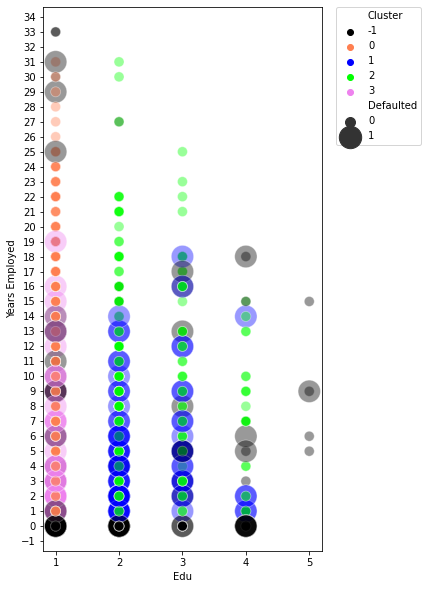

In [41]:
fig, ax = plt.subplots(figsize=(5, 10))

sns.scatterplot(x=df.Edu, 
                y=df['Years Employed'], #df.Defaulted, 
                size=df.Defaulted, 
                sizes=(500, 100), 
                hue=df.Cluster, 
                alpha=0.4, 
                palette=cmap,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3-D

In [42]:
cluster_examples['Cluster'] = cluster_examples.Cluster.astype(int)

In [43]:
cluster_examples

,Address,Age,Card Debt,Cluster,DebtIncomeRatio,Defaulted,Edu,Income,Other Debt,Years Employed
643,NBA023,42.0,3.157,-1,7.8,0.0,5.0,190.0,11.663,6.0
633,NBA022,48.0,1.468,0,3.2,0.0,1.0,66.0,0.644,17.0
565,NBA005,25.0,0.549,1,5.0,1.0,2.0,27.0,0.801,4.0
674,NBA008,30.0,0.350,2,6.5,0.0,2.0,15.0,0.625,4.0
632,NBA000,36.0,0.815,3,11.2,1.0,1.0,28.0,2.321,10.0


In [44]:
clusters

array([-1,  0,  1,  2,  3])

In [62]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-40, elev=-150)


ax.scatter(df.Edu, df.Defaulted, df['Years Employed'],
           c=df.Cluster,
           alpha=0.4, 
           s=80, 
           cmap=cmap)

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Years Employed')


norm = BoundaryNorm(clusters, cmap.N-1)
for index, row in cluster_examples.iterrows():
    ax.scatter(row.Edu, row.Defaulted + 0.1, row['Years Employed'], 
               c=row.Cluster, 
               marker=f'${row.Cluster:1.0f}$', 
               alpha=1,
               s=500, 
               edgecolor='gray', 
               norm=norm,
               cmap=cmap)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [63]:
%matplotlib inline